 Baje de los archivos al problema XOR. Grafique las clases. Observando el problema, indique cuál es el árbol más simple que clasifica correctamente todos los puntos. Aplique ahora un árbol con el siguiente setup DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 
sobre este problema, y explique el resultado obtenido.

In [1]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd
from distribuciones import diagonal, paralelo
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn import tree 

In [2]:
df = pd.read_csv('xor.csv')

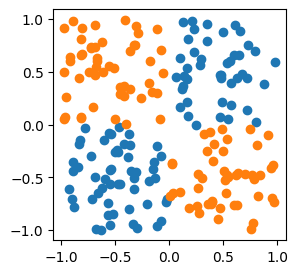

In [3]:
c0, = np.where(df.iloc[:,2] == 0)
c1, = np.where(df.iloc[:,2] == 1)
plt.figure(figsize=(3,3))
plt.plot(df.iloc[c0,0],df.iloc[c0,1],ls='none',marker='o')
plt.plot(df.iloc[c1,0],df.iloc[c1,1],ls='none',marker='o')

el arbol mas sencillo es aquel que separa en x=0 e y=0 y asigna a la clase 1 aquellos puntos con (x>0 e y<0) o (x<0 e y>0)
y el resto clase 0 

In [14]:
y = df.iloc[:,2].values
X = df.iloc[:,0:2].values
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.01,random_state=0,min_samples_leaf=5) 
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       min_samples_leaf=5, random_state=0)

In [36]:
#tree.plot_tree(clf)

In [15]:
prediccion_training = clf.predict(X)

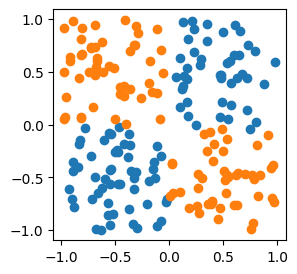

In [16]:
c0_t, = np.where(prediccion_training == 0)
c1_t, = np.where(prediccion_training == 1)
plt.figure(figsize=(3,3))
plt.plot(df.iloc[c0_t,0],df.iloc[c0_t,1],ls='none',marker='o')
plt.plot(df.iloc[c1_t,0],df.iloc[c1_t,1],ls='none',marker='o')

<span style="color:green;">

El C4.5 solamente agrega un nodo si la ganacia de informacion supera un cierto threshold. 
Si la ganancia de información calculada para un atributo es menor que la impureza mínima necesaria para la división, entonces la división no se realizará. De esta manera, el parámetro min_impurity_decrease actúa como una forma de controlar la ganancia de información al definir una impureza mínima que debe reducirse para que se produzca una división.

La primera particion del arbol (ej x=0) produce que haya igual numero de valores con clase 0 y 1 en cada nodo (por la simetria del problema) entonces si el min_impurity_decrease es grande (como es este caso) quiere decir que tiene que reducirse mucho la impureza para justificarse hacer una particion. En este caso, como partir en principio no mejora nada entonces no se hace nunca la particion.

</span>